# scikit learn classification

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [101]:
iris_dataset = load_iris()

### 데이터 분리

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
train_feat, test_feat, train_label, test_label = \
    train_test_split(iris_dataset['data'],
                    iris_dataset['target'],
                    test_size=0.3, random_state=42)

In [104]:
train_feat1, test_feat1, train_label1, test_label1 = \
    train_test_split(iris_dataset['data'],
                    iris_dataset['target'],
                    test_size=0.3, random_state=42)

In [105]:
train_feat2, test_feat2, train_label2, test_label2 = \
    train_test_split(iris_dataset['data'],
                    iris_dataset['target'],
                    test_size=0.3, random_state=41)

In [106]:
train_feat.shape

(105, 4)

In [107]:
train_label.shape

(105,)

In [108]:
# random state 확인
np.unique(train_feat == train_feat1) # 같은 42

array([ True])

In [109]:
# random state 확인
np.unique(train_feat == train_feat2)

array([False,  True])

### 다양한 머신러닝 분류 기법


### 1. k-nearest neighbor(KNN, k-최근접 이웃)
- parameter : 이웃 수

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
# 1. 모든 feature 사용

X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.3, random_state=35)

In [112]:
np.bincount(y_train)

array([34, 36, 35], dtype=int64)

In [113]:
# 모델 객체 생성

clf = KNeighborsClassifier(n_neighbors = 3)

In [114]:
# 모델 훈련

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [115]:
# 예측

predict_label = clf.predict(X_test)

In [116]:
# 정학도

predict_label == y_test

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True])

In [117]:
print('test accuracy : {:.2f}'.format(np.mean(predict_label == y_test)))

test accuracy : 0.91


In [118]:
## 적절한 k값 찾기 1

# 모델 객체 생성
clf1 = KNeighborsClassifier(n_neighbors = 3)

# 모델 훈련
clf1.fit(X_train, y_train)

# 예측
predict_label = clf1.predict(X_test)

# 결과
print('train set accuracy : {:.2f}'.format(clf1.score(X_train, y_train)))
print('test set accuracy : {:.2f}'.format(clf1.score(X_test, y_test)))

train set accuracy : 0.99
test set accuracy : 0.91


In [119]:
## 적절한 k값 찾기 2

# 모델 객체 생성
clf2 = KNeighborsClassifier(n_neighbors = 7)

# 모델 훈련
clf2.fit(X_train, y_train)

# 예측
predict_label = clf2.predict(X_test)

# 결과
print('train set accuracy : {:.2f}'.format(clf2.score(X_train, y_train)))
print('test set accuracy : {:.2f}'.format(clf2.score(X_test, y_test)))

train set accuracy : 0.99
test set accuracy : 0.96


---

In [120]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [121]:
## data split

X1 = iris_dataset.data[:,2:4]
y1 = iris_dataset.target

X1_train, X1_test, y1_train, y1_test = \
    train_test_split(X1,y1, test_size=0.3, random_state=35)

In [122]:
## 데이터 확인: 위에서 추출한 데이터와 동일

np.unique(X1_train == X_train[:,2:4])

array([ True])

In [123]:
np.bincount(y_train)

array([34, 36, 35], dtype=int64)

(array([34.,  0.,  0.,  0.,  0., 36.,  0.,  0.,  0., 35.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

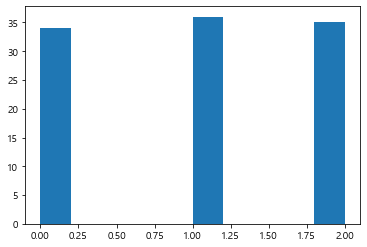

In [124]:
plt.hist(y_train)

In [125]:
# 모델 객체 생성

clf3 = KNeighborsClassifier(n_neighbors = 21)

In [126]:
# 모델 훈련

clf3.fit(X1_train, y1_train)

KNeighborsClassifier(n_neighbors=21)

In [127]:
# 예측

predict_label = clf3.predict(X1_test)

In [128]:
# 정확도

predict_label == y1_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True])

In [129]:
print('test accuracy : {:.2f}'.format(np.mean(predict_label == y1_test)))
print('train set accuracy : {:.2f}'.format(clf3.score(X1_train, y1_train)))
print('test set accuracy : {:.2f}'.format(clf3.score(X1_test, y1_test)))

test accuracy : 0.96
train set accuracy : 0.96
test set accuracy : 0.96


---

In [130]:
n_neigh = [3,7,21]
train_acc = [clf1.score(X_train, y_train),
            clf2.score(X_train, y_train),
            clf3.score(X1_train, y1_train)]
test_acc = [clf1.score(X_test, y_test),
            clf2.score(X_test, y_test),
            clf3.score(X1_test, y1_test)]

## plotting

In [131]:
import matplotlib.font_manager as fm

In [132]:
font_path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

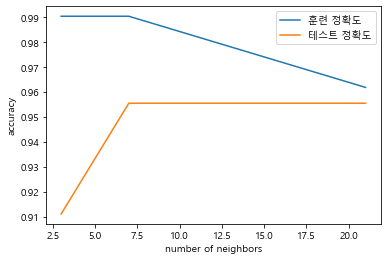

In [133]:
plt.plot(n_neigh, train_acc, label="훈련 정확도")
plt.plot(n_neigh, test_acc, label="테스트 정확도")
plt.ylabel("accuracy")
plt.xlabel("number of neighbors")
plt.legend()
plt.show()

## 예제

scikit learn의 load_breast_cancer를 이용하여

n_neighbors를 1~11로 변화시켜가며 트레인 정확도와 테스트 정확도 그래프를 확인하고

가장 적절한 k값을 판단

In [72]:
from sklearn.datasets import load_breast_cancer

In [73]:
bc_dataset = load_breast_cancer()

In [77]:
print(bc_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [74]:
print("bc_dataset:{}".format(bc_dataset.keys()))

bc_dataset:dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [86]:
print(np.unique(bc_dataset['target']))
print(bc_dataset['target_names'])
print(bc_dataset['feature_names'])
print(bc_dataset['data'])

[0 1]
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [175]:
# 1. 모든 feature 사용

X = bc_dataset.data
y = bc_dataset.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.3, random_state=33)

In [176]:
clf_list = list()
clf_list.append([KNeighborsClassifier(),[]]) # idx=0 더미데이터

In [177]:
for i in range(1,11+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    predict_label = clf.predict(X_test)
    clf_list.append([clf,predict_label])

In [178]:
n_neigh = [n for n in range(1,11+1)]
train_acc = [clf_list[n][0].score(X_train, y_train) for n in range(1,11+1)]
test_acc = [clf_list[n][0].score(X_test, y_test) for n in range(1,11+1)]

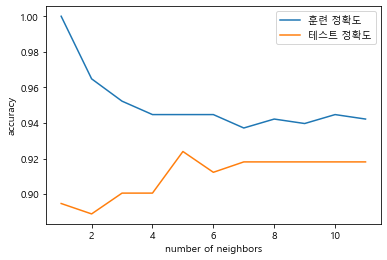

In [179]:
plt.plot(n_neigh, train_acc, label="훈련 정확도")
plt.plot(n_neigh, test_acc, label="테스트 정확도")
plt.ylabel("accuracy")
plt.xlabel("number of neighbors")
plt.legend()
plt.show()

# 적절한 k값 = 5

---
### 2. Decision Tree

In [215]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

In [216]:
iris_dataset = load_iris()

In [217]:
# 모든 feature 사용

X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.3, random_state=58)

In [218]:
# 객체 생성

clf = tree.DecisionTreeClassifier(max_depth=None) # 가지 제한 없이 끝까지 : 과적합이 일어날 가능성이 높음

In [228]:
# 모델링

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [220]:
print('훈련 셋 점수 : {:.3f}'.format(clf.score(X_train, y_train)))
print('테스트 셋 점수 : {:.3f}'.format(clf.score(X_test, y_test)))

훈련 셋 점수 : 1.000
테스트 셋 점수 : 0.933


In [221]:
from dtreeplt import dtreeplt

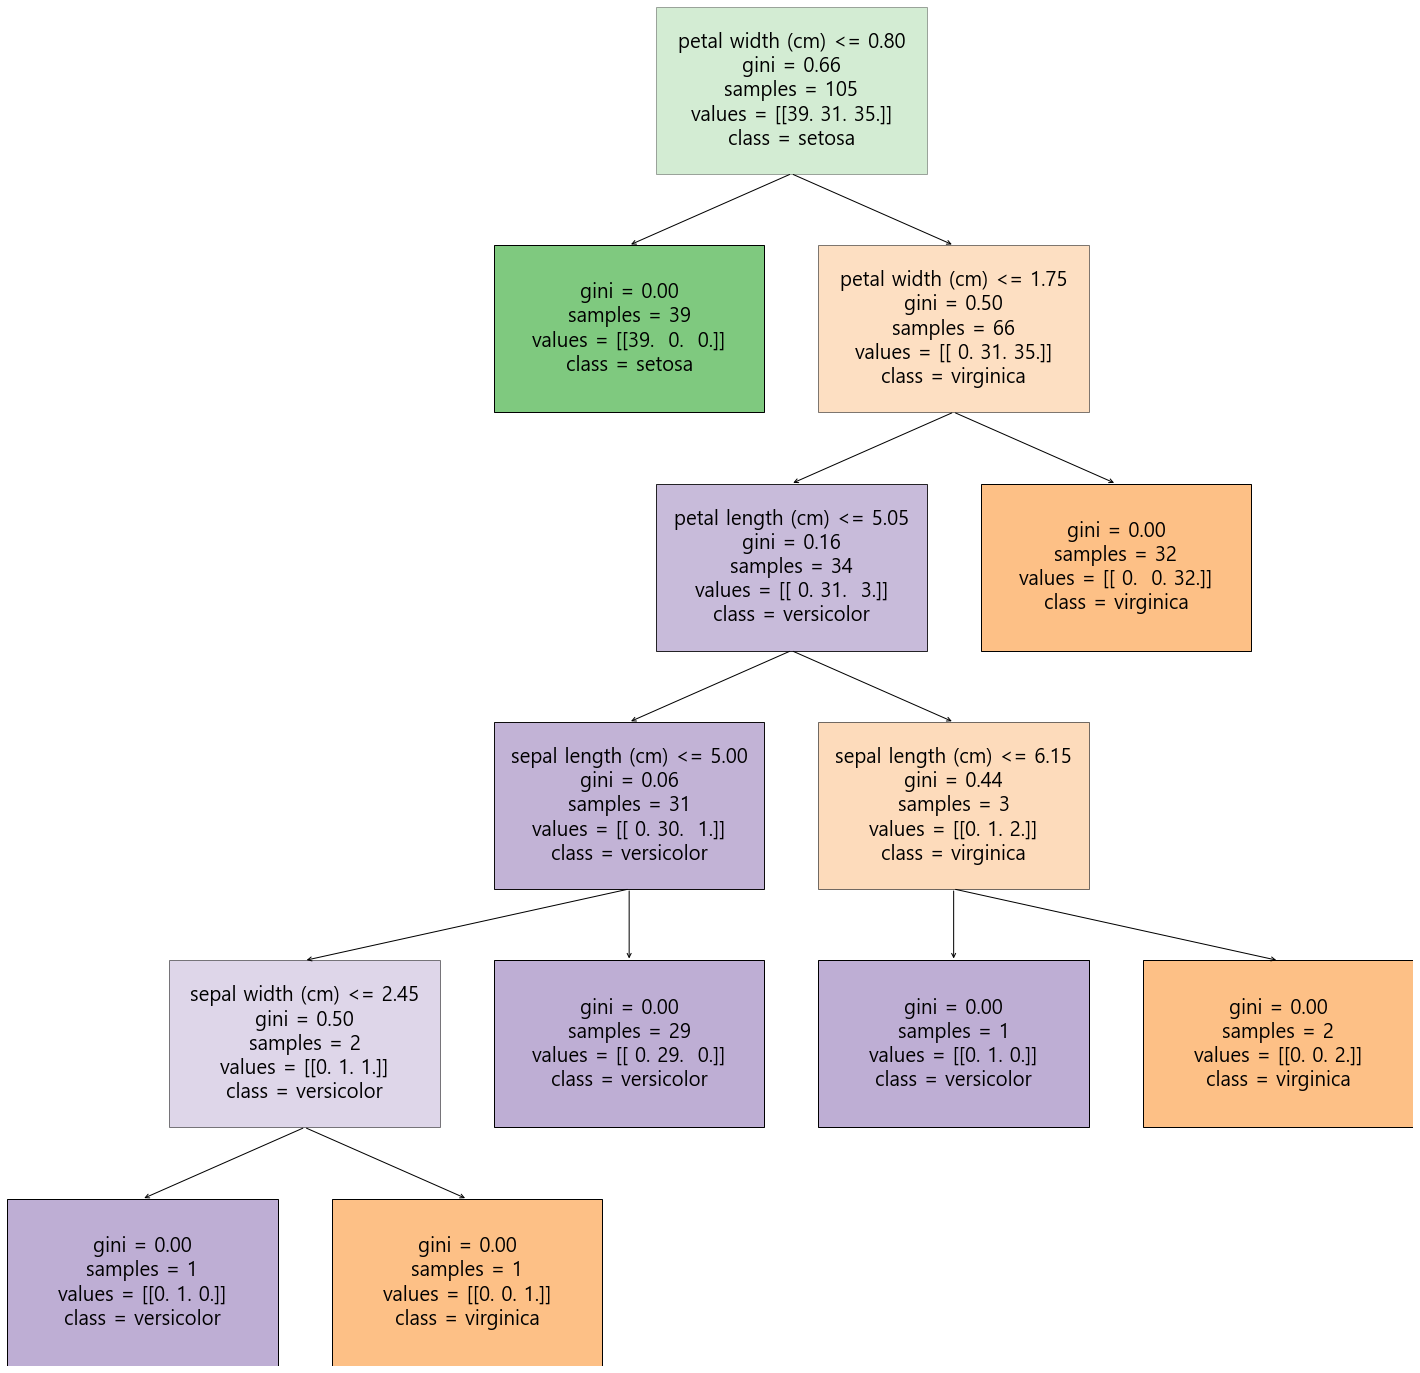

In [222]:
dtree = dtreeplt(model=clf,
                feature_names=iris_dataset.feature_names,
                target_names=iris_dataset.target_names)
fig = dtree.view()

In [223]:
fig.savefig('output/dtree.png')

In [225]:
# import sys
# print('\n'.join(sys.path))
# import os
# os.environ['PATH'] += os.pathsep + 'C:\ProgramData\Anaconda3\Library\bin\graphviz'

C:\Users\admin\Desktop\GitHub\study\200902~ 데이터 분석(python)
C:\ProgramData\Anaconda3\python38.zip
C:\ProgramData\Anaconda3\DLLs
C:\ProgramData\Anaconda3\lib
C:\ProgramData\Anaconda3

C:\ProgramData\Anaconda3\lib\site-packages
C:\ProgramData\Anaconda3\lib\site-packages\win32
C:\ProgramData\Anaconda3\lib\site-packages\win32\lib
C:\ProgramData\Anaconda3\lib\site-packages\Pythonwin
C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions
C:\Users\admin\.ipython


In [226]:
from sklearn.tree import export_graphviz
import graphviz

In [229]:
# 그래프 생성

export_graphviz(clf, out_file="tree.dot",
               feature_names=iris_dataset.feature_names,
               class_names=iris_dataset.target_names,
               filled=True)

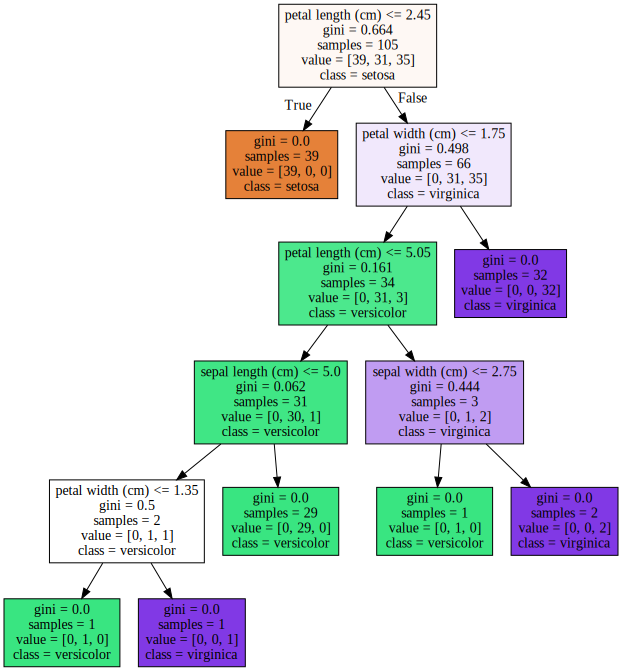

In [277]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

결정트리의 복잡도 제어: 과대적합 방지

- 사전 가지치기
- 사후 가지치기

In [247]:
# 객체 생성

clf1 = tree.DecisionTreeClassifier(max_depth=3)

In [248]:
# 모델링

clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [249]:
print('훈련 셋 점수 : {:.3f}'.format(clf1.score(X_train, y_train)))
print('테스트 셋 점수 : {:.3f}'.format(clf1.score(X_test, y_test)))

훈련 셋 점수 : 0.981
테스트 셋 점수 : 0.956


- 변수 중요도(feature importance) : 0~1 사이의 값, 중요할 수록 1에 가까움

In [250]:
clf1.feature_importances_

array([0.        , 0.        , 0.03314601, 0.96685399])

(-1.0, 4.0)

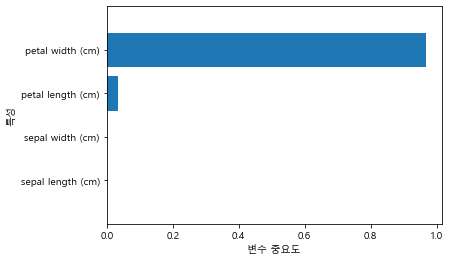

In [251]:
n_features = iris_dataset.data.shape[1]
plt.barh(range(n_features), clf1.feature_importances_, align='center')
plt.yticks(np.arange(n_features), iris_dataset.feature_names)
plt.xlabel("변수 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)

---

In [256]:
from sklearn.datasets import load_breast_cancer

In [257]:
X = bc_dataset.data
y = bc_dataset.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.3, random_state=58)

In [263]:
clf_list = list()
clf_list.append(tree.DecisionTreeClassifier().fit(X_train, y_train))
clf_list.extend([tree.DecisionTreeClassifier(max_depth=n).fit(X_train, y_train) for n in range(1,10+1)])

clf_list

[DecisionTreeClassifier(),
 DecisionTreeClassifier(max_depth=1),
 DecisionTreeClassifier(max_depth=2),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=4),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=6),
 DecisionTreeClassifier(max_depth=7),
 DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=10)]

In [265]:
train_acc = [clf_list[n].score(X_train, y_train) for n in range(0,10+1)]
test_acc = [clf_list[n].score(X_test, y_test) for n in range(0,10+1)]

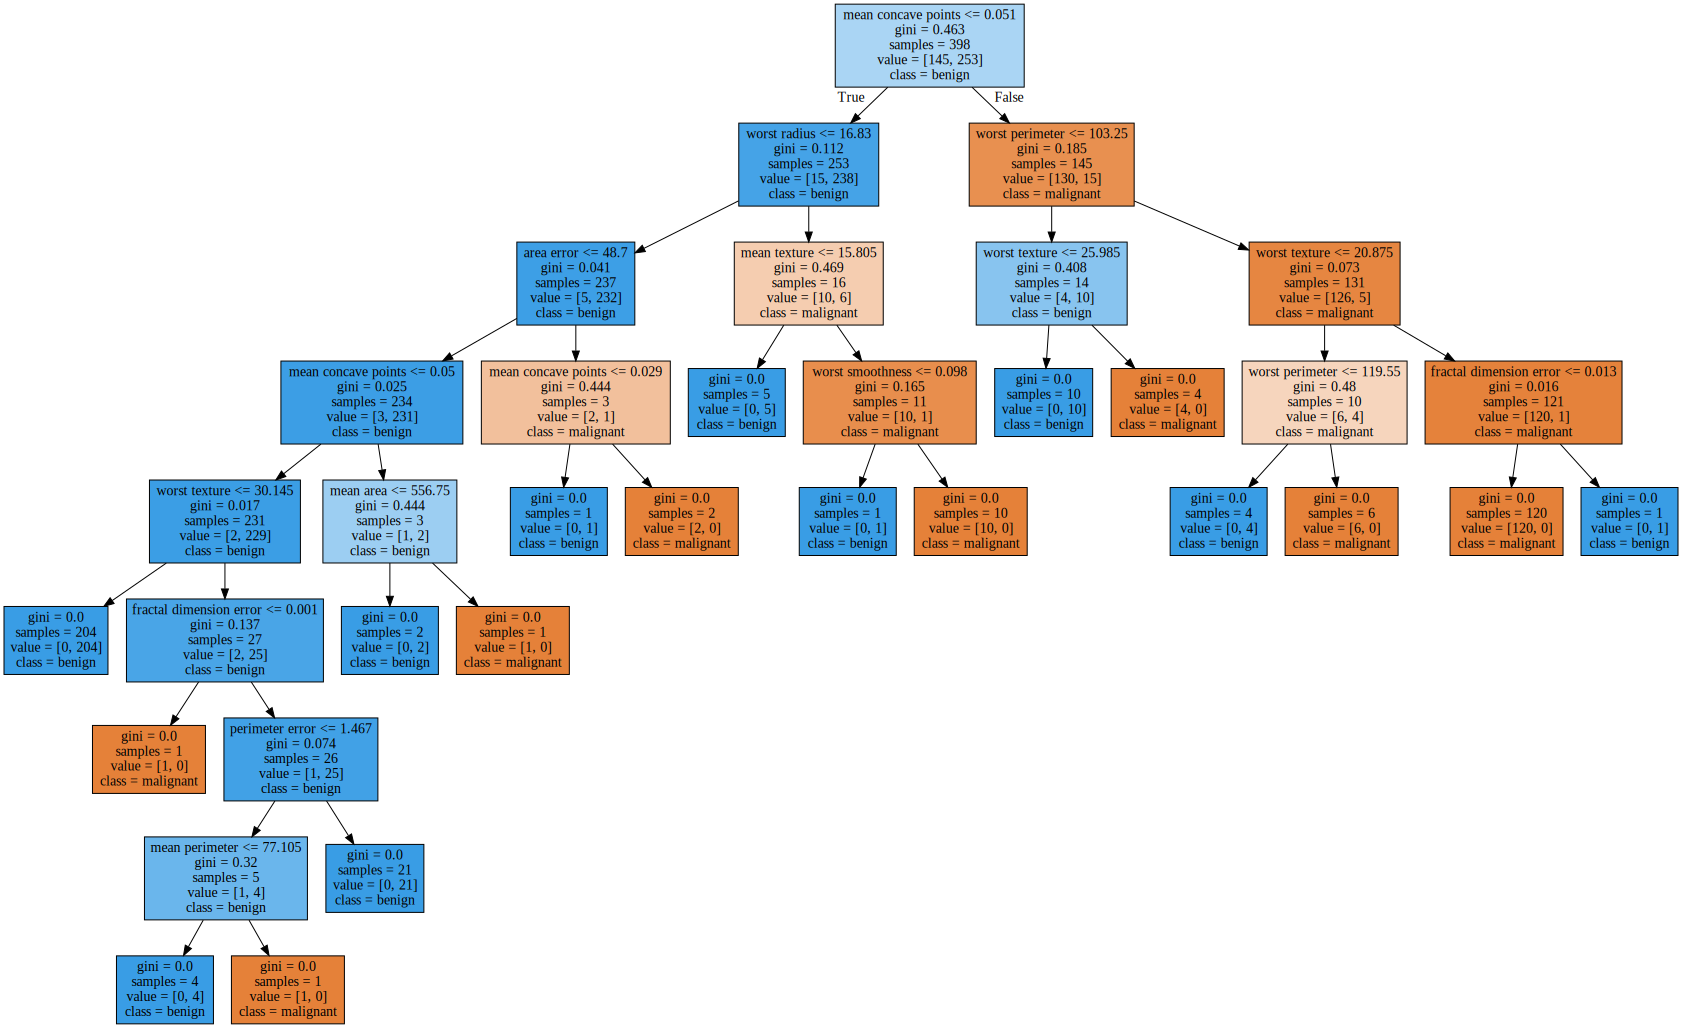

In [279]:
export_graphviz(clf_list[0], out_file="tree_bc.dot",
               feature_names=bc_dataset.feature_names,
               class_names=bc_dataset.target_names,
               filled=True)
with open('tree_bc.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

(-1.0, 30.0)

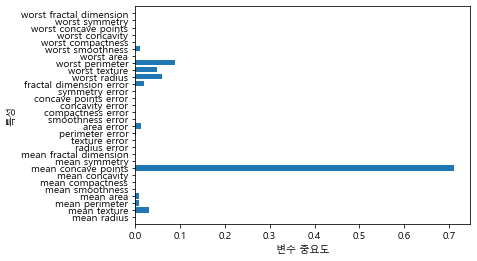

In [280]:
n_features = bc_dataset.data.shape[1]
plt.barh(range(n_features), clf_list[0].feature_importances_, align='center')
plt.yticks(np.arange(n_features), bc_dataset.feature_names)
plt.xlabel("변수 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)

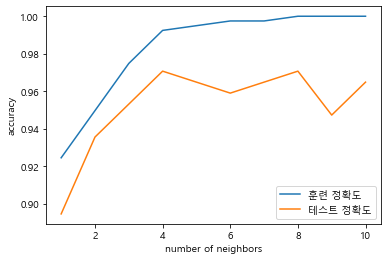

In [274]:
plt.plot(range(1,10+1), train_acc[1:10+1], label="훈련 정확도")
plt.plot(range(1,10+1), test_acc[1:10+1], label="테스트 정확도")
plt.ylabel("accuracy")
plt.xlabel("number of neighbors")
plt.legend()
plt.show()

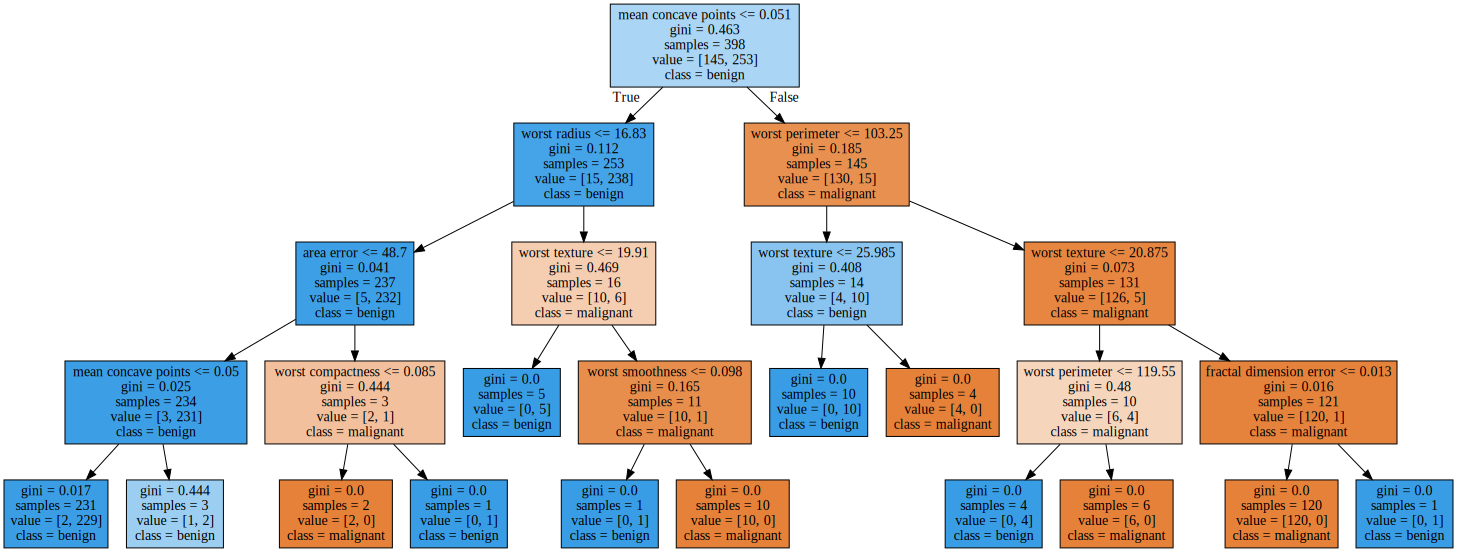

In [281]:
export_graphviz(clf_list[4], out_file="tree_bc4.dot",
               feature_names=bc_dataset.feature_names,
               class_names=bc_dataset.target_names,
               filled=True)
with open('tree_bc4.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

(-1.0, 30.0)

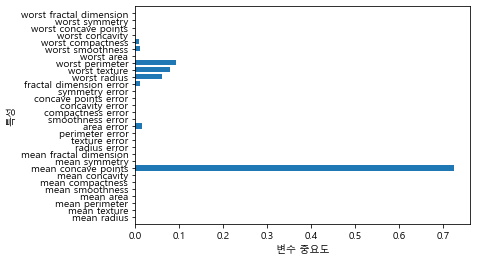

In [282]:
n_features = bc_dataset.data.shape[1]
plt.barh(range(n_features), clf_list[4].feature_importances_, align='center')
plt.yticks(np.arange(n_features), bc_dataset.feature_names)
plt.xlabel("변수 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)